In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('~/active-projects/textbook-question-generation/data/aqag-chatgpt-vicuna.csv')
# df.rename({'correct_answer_vicuna': 'gold_answer'}, axis=1, inplace=True)
df.rename({'correct_answer': 'gold_answer'}, axis=1, inplace=True)
df.rename({'correct_answer_vicuna': 'correct_answer'}, axis=1, inplace=True)
df.dropna(subset=['clean_text', 'question', 'correct_answer', 'incorrect_answer', 'gold_answer'], inplace=True)
df = df[['type', 'question', 'gold_answer', 'correct_answer', 'incorrect_answer']]
df.head() # shape - 1464 x 5

,type,question,gold_answer,correct_answer,incorrect_answer
0,recall,How can social media alter how we make decisions?,Social media outlets like Facebook and Twitter...,Social media can alter how we make decisions b...,Social media outlets like Facebook and Twitter...
1,recall,What is economics?,Economics is both a subject area and a way of ...,Economics is a subject area that studies how p...,Economics is primarily about money or finance.
2,recall,What is scarcity?,Scarcity is a fact of life in which human want...,Scarcity refers to the limited availability of...,Scarcity is when resources are infinite and hu...
3,recall,What is the name of the database where most of...,The St. Louis Federal Reserve Bank's FRED data...,The data used for this course is obtained from...,The US Census Bureau database.
4,recall,What economic principle does Adam Smith first ...,Division and specialization of labor.,Adam Smith first put forth the division and sp...,Scarcity.


In [3]:
temp_correct_df = df[['type', 'question', 'gold_answer', 'correct_answer']]
temp_correct_df = temp_correct_df.rename(columns={'correct_answer': 'student_response'})
temp_correct_df['true_label'] = 1

temp_incorrect_df = df[['type', 'question', 'gold_answer', 'incorrect_answer']]
temp_incorrect_df = temp_incorrect_df.rename(columns={'incorrect_answer': 'student_response'})
temp_incorrect_df['true_label'] = 0

new_df = pd.concat([temp_correct_df, temp_incorrect_df]).reset_index(drop=True)
new_df.head() # shape - 2928 x 5

,type,question,gold_answer,student_response,true_label
0,recall,How can social media alter how we make decisions?,Social media outlets like Facebook and Twitter...,Social media can alter how we make decisions b...,1
1,recall,What is economics?,Economics is both a subject area and a way of ...,Economics is a subject area that studies how p...,1
2,recall,What is scarcity?,Scarcity is a fact of life in which human want...,Scarcity refers to the limited availability of...,1
3,recall,What is the name of the database where most of...,The St. Louis Federal Reserve Bank's FRED data...,The data used for this course is obtained from...,1
4,recall,What economic principle does Adam Smith first ...,Division and specialization of labor.,Adam Smith first put forth the division and sp...,1


In [4]:
X = new_df.drop('true_label', axis=1)
y = new_df['true_label']

In [5]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.4, random_state=42)
X_train.shape, y_train.shape, X_holdout.shape, y_holdout.shape

((1756, 4), (1756,), (1172, 4), (1172,))

In [6]:
X_test, X_val, y_test, y_val = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=42)
X_test.shape, y_test.shape, X_val.shape, y_val.shape

((586, 4), (586,), (586, 4), (586,))

In [7]:
X_train['true_label'] = y_train
print(set(X_train['true_label'] == y_train))
X_train.head()

{True}


,type,question,gold_answer,student_response,true_label
2818,inference,What three criteria does the government use to...,The three criteria that the government uses to...,The three criteria that the government uses to...,0
2808,inference,What is one example of an automatic stabilizer...,Higher unemployment and a weaker economy can l...,The government provides tax cuts to help reduc...,0
2889,inference,What type of information can be found on this ...,Trade-related data visualizations.,Recipes for dinner.,0
1506,recall,What caused the price for gasoline to fall sha...,Increases in supply and decreases in the deman...,People driving more in the summer and being wi...,0
1690,recall,What did the U.S. government do in response to...,The government implemented programs like the A...,The government increased taxes to help million...,0


In [8]:
X_test['true_label'] = y_test
print(set(X_test['true_label'] == y_test))
X_test.head()

{True}


,type,question,gold_answer,student_response,true_label
528,summarization,What does the tradeoff diagram illustrate?,"The tradeoff diagram illustrates scarcity, tra...","The tradeoff diagram illustrates scarcity, tra...",1
1750,recall,What is the total amount of imports for an aft...,$48,$20,0
2687,inference,What is the Keynesian economic response to an ...,The Keynesian response would be to enact a pol...,The Keynesian response would be to enact a pol...,0
2783,inference,Why did expansionary monetary policy have litt...,Banks were holding excess reserves above the l...,Japan's central bank had lowered the equivalen...,0
471,recall,What is the real question that needs to be ask...,What are acceptable and enforceable minimum la...,The real question that needs to be asked regar...,1


In [9]:
X_val['true_label'] = y_val
print(set(X_val['true_label'] == y_val))
X_val.head()

{True}


,type,question,gold_answer,student_response,true_label
2877,inference,Why did Japan experience a trade surplus for t...,"Japan had a high rate of domestic savings, and...",Japan's economy was growing vigorously and had...,0
93,recall,What is a good economic growth rate according ...,A growth rate of more than 3% is considered good.,A growth rate of more than 3% is considered good.,1
347,recall,What is the impact of an $800 billion dollar i...,The monetary stimulus increased the quantity o...,The increase in the money supply increases the...,1
1672,recall,What is the equilibrium point shown on Figure ...,"The equilibrium point occurs at point E, at a ...","The equilibrium point occurs at point E, at a ...",0
178,recall,What is the purpose of the Core Inflation Index?,The purpose of the Core Inflation Index is to ...,The Core Inflation Index is used to measure th...,1


<Axes: ylabel='Frequency'>

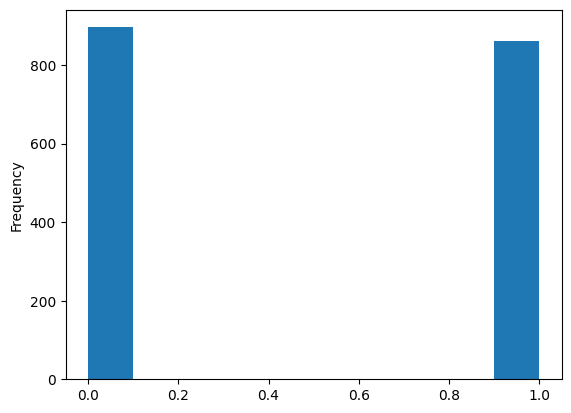

In [10]:
X_train["true_label"].plot(kind="hist")

<Axes: ylabel='Frequency'>

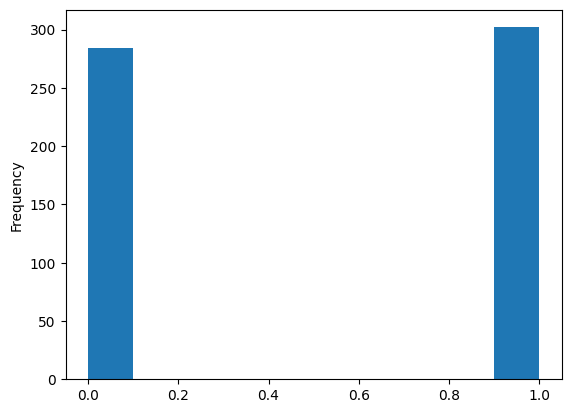

In [11]:
X_test["true_label"].plot(kind="hist")

<Axes: ylabel='Frequency'>

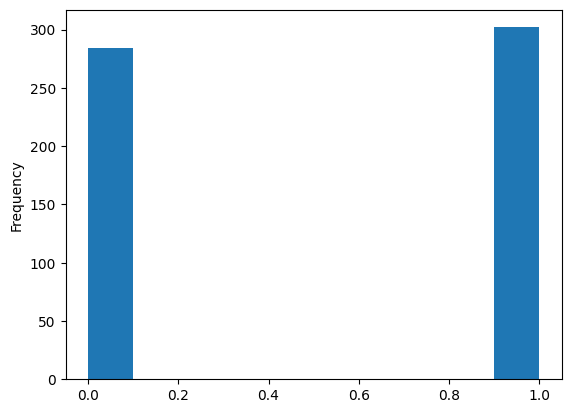

In [12]:
X_val["true_label"].plot(kind="hist")

In [13]:
train_samples = [{"candidate":row["student_response"], "reference":row["gold_answer"], "score":row["true_label"]} for _, row in X_train.iterrows()]
test_samples = [{"candidate":row["student_response"], "reference":row["gold_answer"], "score":row["true_label"]} for _, row in X_test.iterrows()]
val_samples = [{"candidate":row["student_response"], "reference":row["gold_answer"], "score":row["true_label"]} for _, row in X_val.iterrows()]

len(train_samples) == X_train.shape[0], len(test_samples) == X_test.shape[0], len(val_samples) == X_val.shape[0]

(True, True, True)

In [14]:
with open('/home/jovyan/active-projects/textbook-question-generation/bleurt/bleurt/bleurt/test_data/train_samples.jsonl', 'w') as f:
    for sample in train_samples:
        json.dump(sample, f)
        f.write('\n')

train_samples[:2]

[{'candidate': 'The three criteria that the government uses to judge eligibility are age, gender, and the cost of the institution.',
  'reference': 'The three criteria that the government uses to judge eligibility are income, full-time or part-time attendance, and the cost of the institution.',
  'score': 0},
 {'candidate': 'The government provides tax cuts to help reduce the size of budget deficits.',
  'reference': 'Higher unemployment and a weaker economy can lead to increased government spending on unemployment benefits and welfare.',
  'score': 0}]

In [15]:
with open('/home/jovyan/active-projects/textbook-question-generation/bleurt/bleurt/bleurt/test_data/test_samples.jsonl', 'w') as f:
    for sample in test_samples:
        json.dump(sample, f)
        f.write('\n')

test_samples[:2]

[{'candidate': 'The tradeoff diagram illustrates scarcity, tradeoffs, and economic efficiency.',
  'reference': 'The tradeoff diagram illustrates scarcity, tradeoffs, and economic efficiency.',
  'score': 1},
 {'candidate': '$20', 'reference': '$48', 'score': 0}]

In [16]:
with open('/home/jovyan/active-projects/textbook-question-generation/bleurt/bleurt/bleurt/test_data/val_samples.jsonl', 'w') as f:
    for sample in val_samples:
        json.dump(sample, f)
        f.write('\n')

val_samples[:2]

[{'candidate': "Japan's economy was growing vigorously and had a robust economic health.",
  'reference': 'Japan had a high rate of domestic savings, and more to invest abroad than in their own economy.',
  'score': 0},
 {'candidate': 'A growth rate of more than 3% is considered good.',
  'reference': 'A growth rate of more than 3% is considered good.',
  'score': 1}]

In [ ]:
# python -m bleurt.finetune -init_bleurt_checkpoint=bleurt/test_checkpoint_base_128 -model_dir=/home/jovyan/active-projects/textbook-question-generation/bleurt/trained_bleurt/ -train_set=bleurt/test_data/train_samples.jsonl -dev_set=bleurt/test_data/test_samples.jsonl -num_train_steps=500

In [29]:
import numpy as np
import pandas as pd

import spacy
from nltk import ngrams as nltk_ngrams

from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

import evaluate

import seaborn as sns
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')

bleurt_model = evaluate.load("bleurt", module_type="metric", checkpoint="/home/jovyan/active-projects/textbook-question-generation/bleurt/trained_bleurt/")

INFO:tensorflow:Reading checkpoint /home/jovyan/.cache/huggingface/metrics/bleurt/default/downloads/extracted/bdfa1ee4ee11acef1b6b4614c809053c68eaf56a2181893dde453e318a0280af/bleurt-base-128.


INFO:tensorflow:Reading checkpoint /home/jovyan/.cache/huggingface/metrics/bleurt/default/downloads/extracted/bdfa1ee4ee11acef1b6b4614c809053c68eaf56a2181893dde453e318a0280af/bleurt-base-128.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Config file found, reading.


INFO:tensorflow:Will load checkpoint bert_custom


INFO:tensorflow:Will load checkpoint bert_custom


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:Loads full paths and checks that files exists.


INFO:tensorflow:... name:bert_custom


INFO:tensorflow:... name:bert_custom


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... vocab_file:vocab.txt


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... bert_config_file:bert_config.json


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... do_lower_case:True


INFO:tensorflow:... max_seq_length:128


INFO:tensorflow:... max_seq_length:128


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating BLEURT scorer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:Creating WordPiece tokenizer.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:WordPiece tokenizer instantiated.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Creating Eager Mode predictor.


INFO:tensorflow:Loading model.


INFO:tensorflow:Loading model.


INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.


In [30]:
df = X_val.copy()
df

,type,question,gold_answer,student_response,true_label
2877,inference,Why did Japan experience a trade surplus for t...,"Japan had a high rate of domestic savings, and...",Japan's economy was growing vigorously and had...,0
93,recall,What is a good economic growth rate according ...,A growth rate of more than 3% is considered good.,A growth rate of more than 3% is considered good.,1
347,recall,What is the impact of an $800 billion dollar i...,The monetary stimulus increased the quantity o...,The increase in the money supply increases the...,1
1672,recall,What is the equilibrium point shown on Figure ...,"The equilibrium point occurs at point E, at a ...","The equilibrium point occurs at point E, at a ...",0
178,recall,What is the purpose of the Core Inflation Index?,The purpose of the Core Inflation Index is to ...,The Core Inflation Index is used to measure th...,1
...,...,...,...,...,...
807,summarization,What is money deposited in bank accounts typic...,"It is loaned to businesses, individuals, and o...",Bank loans.,1
1075,inference,What is considered a good rate of economic gro...,A growth rate of more than 3% is considered good.,A growth rate of more than 3% is considered good.,1
199,recall,Who argued that supply is the most important d...,Macroeconomists over the last two centuries.,The first group of macroeconomists argued that...,1
449,recall,What does comparative advantage identify?,Comparative advantage identifies the good for ...,Comparative advantage identifies the good for ...,1


In [31]:
# preprocessing steps for similarity computation:
# 1. lower case
# 2. remove non-alphanumeric characters except those bringing in context - (['@', '#', '$', '%', '*', '<', '>', '.', ','])
# 3. remove stopwords
# 4. lemmatize --- experiment

def func_preprocessing(text:str, lemmatize:bool=False):

    return_list = list()
    doc = nlp(text.lower().strip())
    for token in [token for token in doc]:
        if (token.text.isalnum() or any(i in token.text and token.text.count(i) == 1 for i in ['@', '#', '$', '%', '<', '>', '.', ',', '+', '-', '*'])) and (not token.is_stop):
            if lemmatize:
                return_list.append(token.lemma_)
            else:
                return_list.append(token.text)
    
    return ' '.join(return_list)

df['processed_gold_answer'] = df['gold_answer'].apply(lambda x: func_preprocessing(x))
df['processed_student_response'] = df['student_response'].apply(lambda x: func_preprocessing(x))

df['processed_lemmatized_gold_answer'] = df['gold_answer'].apply(lambda x: func_preprocessing(x, lemmatize=True))
df['processed_lemmatized_student_response'] = df['student_response'].apply(lambda x: func_preprocessing(x, lemmatize=True))

df.head()

,type,question,gold_answer,student_response,true_label,processed_gold_answer,processed_student_response,processed_lemmatized_gold_answer,processed_lemmatized_student_response
2877,inference,Why did Japan experience a trade surplus for t...,"Japan had a high rate of domestic savings, and...",Japan's economy was growing vigorously and had...,0,"japan high rate domestic savings , invest abro...",japan economy growing vigorously robust econom...,"japan high rate domestic saving , invest abroa...",japan economy grow vigorously robust economic ...
93,recall,What is a good economic growth rate according ...,A growth rate of more than 3% is considered good.,A growth rate of more than 3% is considered good.,1,growth rate 3 % considered good .,growth rate 3 % considered good .,growth rate 3 % consider good .,growth rate 3 % consider good .
347,recall,What is the impact of an $800 billion dollar i...,The monetary stimulus increased the quantity o...,The increase in the money supply increases the...,1,monetary stimulus increased quantity goods ser...,increase money supply increases quantity goods...,monetary stimulus increase quantity good servi...,increase money supply increase quantity good s...
1672,recall,What is the equilibrium point shown on Figure ...,"The equilibrium point occurs at point E, at a ...","The equilibrium point occurs at point E, at a ...",0,"equilibrium point occurs point e , price level...","equilibrium point occurs point e , price level...","equilibrium point occur point e , price level ...","equilibrium point occur point e , price level ..."
178,recall,What is the purpose of the Core Inflation Index?,The purpose of the Core Inflation Index is to ...,The Core Inflation Index is used to measure th...,1,purpose core inflation index provide better gu...,core inflation index measure persistent underl...,purpose core inflation index provide well guid...,core inflation index measure persistent underl...


In [32]:
df['score'] = bleurt_model.compute(predictions=df['student_response'].tolist(), references=df['gold_answer'].tolist())['scores']
df['processed_score'] = bleurt_model.compute(predictions=df['processed_student_response'].tolist(), references=df['processed_gold_answer'].tolist())['scores']
df['processed_lemmatized_score'] = bleurt_model.compute(predictions=df['processed_lemmatized_student_response'].tolist(), references=df['processed_lemmatized_gold_answer'].tolist())['scores']

<Axes: ylabel='Frequency'>

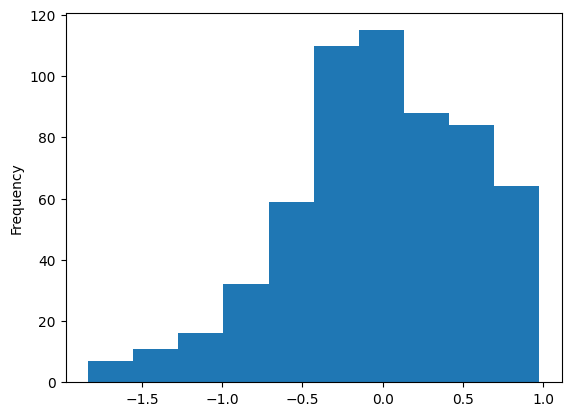

In [33]:
df['score'].plot(kind='hist')

<Axes: ylabel='Frequency'>

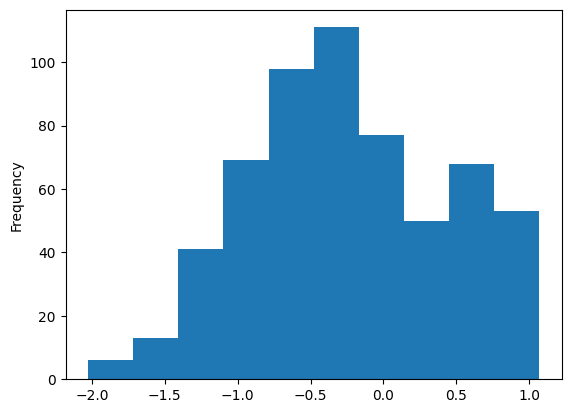

In [34]:
df['processed_score'].plot(kind='hist')

<Axes: ylabel='Frequency'>

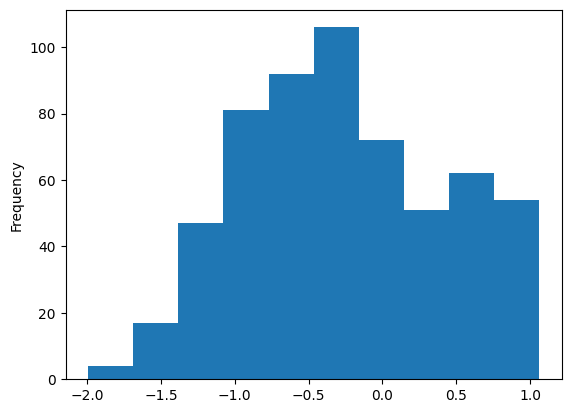

In [35]:
df['processed_lemmatized_score'].plot(kind='hist')

In [48]:
df['label'] = df['score'].apply(lambda x: 1 if x>0 else 0)
df['processed_label'] = df['processed_score'].apply(lambda x: 1 if x>0 else 0)
df['processed_lemmatized_label'] = df['processed_lemmatized_score'].apply(lambda x: 1 if x>0 else 0)

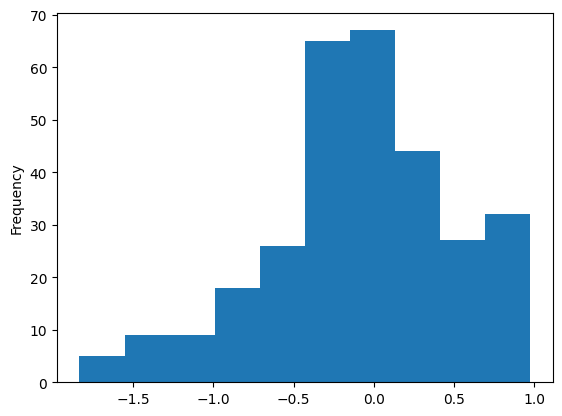

In [49]:
df[df['true_label'] == 1]['score'].plot(kind='hist');

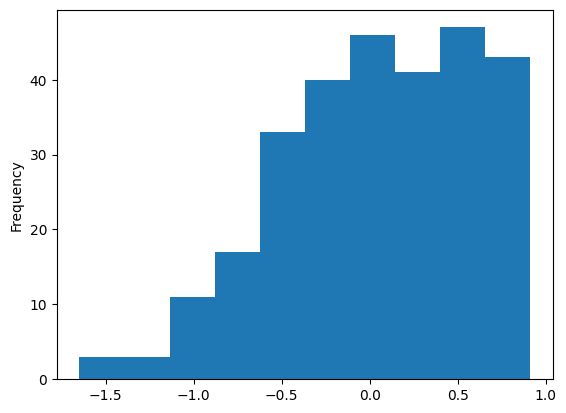

In [50]:
df[df['true_label'] == 0]['score'].plot(kind='hist');

In [51]:
confusion_matrix(df['true_label'], df['label'])

array([[131, 153],
       [169, 133]])

In [52]:
print(classification_report(df['true_label'], df['label']))

              precision    recall  f1-score   support

           0       0.44      0.46      0.45       284
           1       0.47      0.44      0.45       302

    accuracy                           0.45       586
   macro avg       0.45      0.45      0.45       586
weighted avg       0.45      0.45      0.45       586



In [53]:
cohen_kappa_score(df['true_label'], df['label'])

-0.09817022069093961

In [54]:
confusion_matrix(df['true_label'], df['processed_label'])

array([[154, 130],
       [224,  78]])

In [55]:
print(classification_report(df['true_label'], df['processed_label']))

              precision    recall  f1-score   support

           0       0.41      0.54      0.47       284
           1       0.38      0.26      0.31       302

    accuracy                           0.40       586
   macro avg       0.39      0.40      0.39       586
weighted avg       0.39      0.40      0.38       586



In [56]:
cohen_kappa_score(df['true_label'], df['processed_label'])

-0.19752003140369934

In [57]:
confusion_matrix(df['true_label'], df['processed_lemmatized_label'])

array([[162, 122],
       [230,  72]])

In [58]:
print(classification_report(df['true_label'], df['processed_lemmatized_label']))

              precision    recall  f1-score   support

           0       0.41      0.57      0.48       284
           1       0.37      0.24      0.29       302

    accuracy                           0.40       586
   macro avg       0.39      0.40      0.38       586
weighted avg       0.39      0.40      0.38       586



In [59]:
cohen_kappa_score(df['true_label'], df['processed_lemmatized_label'])

-0.18902467143186552